In [46]:
import os
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
%matplotlib inline

### Loading the Data

In [18]:
base_dir = 'D:/DataScience/DataSets/cats_and_dogs_filtered/'

In [19]:
train_dir = os.path.join(base_dir,'train/')
val_dir = os.path.join(base_dir,'validation/')

In [20]:
# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(val_dir, 'cats')
validation_dogs_dir = os.path.join(val_dir, 'dogs')

In [21]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [22]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


### Visualization of Data

In [24]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

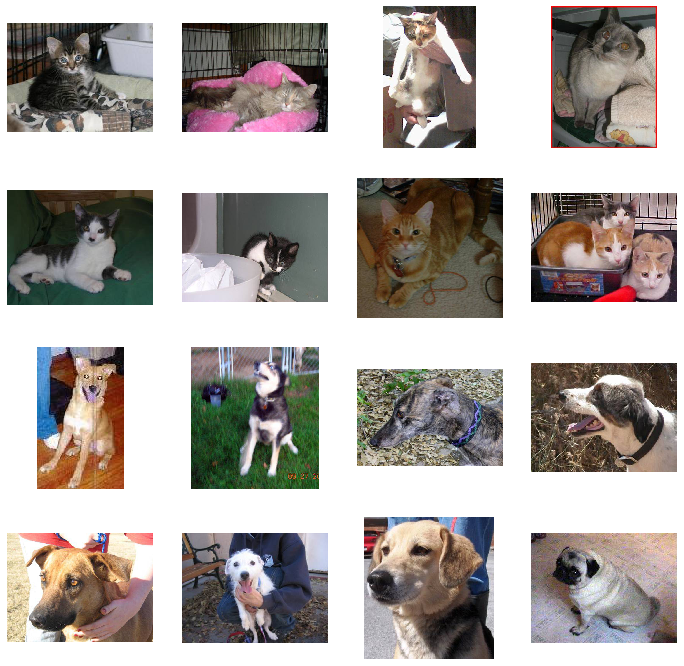

In [28]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


### Data Preprocessing

In [30]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [31]:
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))  

Found 2000 images belonging to 2 classes.


In [33]:
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 1000 images belonging to 2 classes.


### Building CNN Model 

In [35]:
model = tf.keras.models.Sequential()

In [36]:
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [37]:
# Flatten the results to feed into a DNN
model.add(tf.keras.layers.Flatten())
# 512 neuron hidden layer
model.add(tf.keras.layers.Dense(512, activation='relu'))

In [38]:
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)            

In [41]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

### Training the Model

In [42]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 33s - loss: 0.8194 - accuracy: 0.5685 - val_loss: 0.7120 - val_accuracy: 0.5150
Epoch 2/15
100/100 - 36s - loss: 0.6142 - accuracy: 0.6560 - val_loss: 0.5907 - val_accuracy: 0.6920
Epoch 3/15
100/100 - 33s - loss: 0.5391 - accuracy: 0.7090 - val_loss: 0.7489 - val_accuracy: 0.5910
Epoch 4/15
100/100 - 36s - loss: 0.4673 - accuracy: 0.7820 - val_loss: 0.6472 - val_accuracy: 0.6850
Epoch 5/15
100/100 - 34s - loss: 0.3929 - accuracy: 0.8210 - val_loss: 0.6651 - val_accuracy: 0.6880
Epoch 6/15
100/100 - 35s - loss: 0.2962 - accuracy: 0.8740 - val_loss: 0.7173 - val_accuracy: 0.7020
Epoch 7/15
100/100 - 35s - loss: 0.2296 - accuracy: 0.9005 - val_loss: 0.7567 - val_accuracy: 0.6980
Epoch 8/15
100/100 - 35s - loss: 0.1520 - accuracy: 0.9460 - val_loss: 0.9290 - val_accuracy: 0.7050
Epoch 9/15
100/100 - 34s - loss: 0.0988 - accuracy: 0.9645 - val_loss: 1.3255 - val_accuracy: 0.701

### Plotting the learning curve

In [43]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

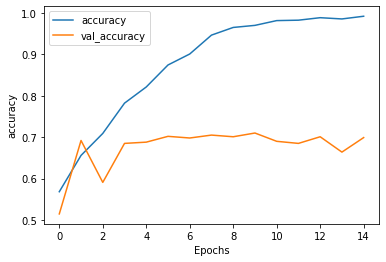

In [44]:
plot_graphs(history, 'accuracy')

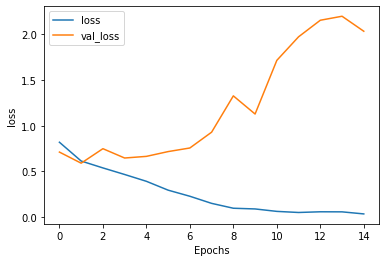

In [45]:
plot_graphs(history, 'loss')

### Visualizating the Intermediate Representations

C:\Users\anurag\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


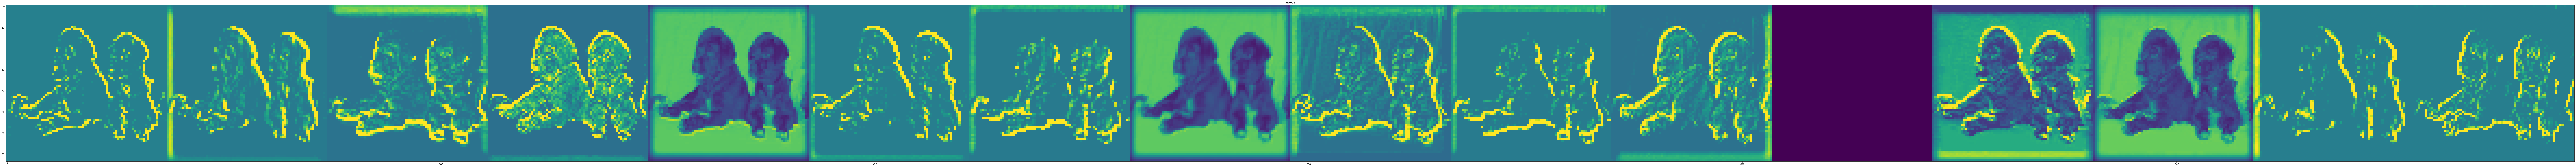

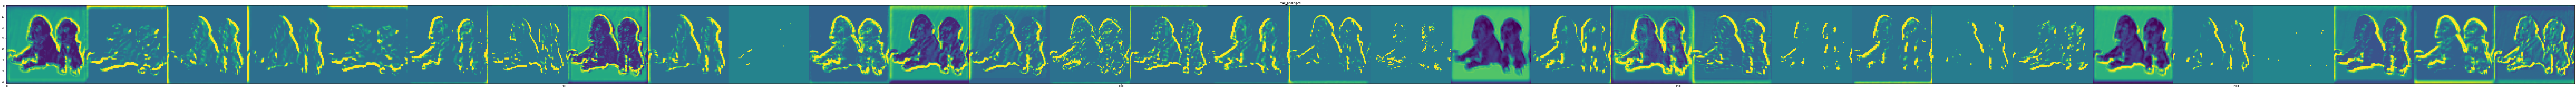

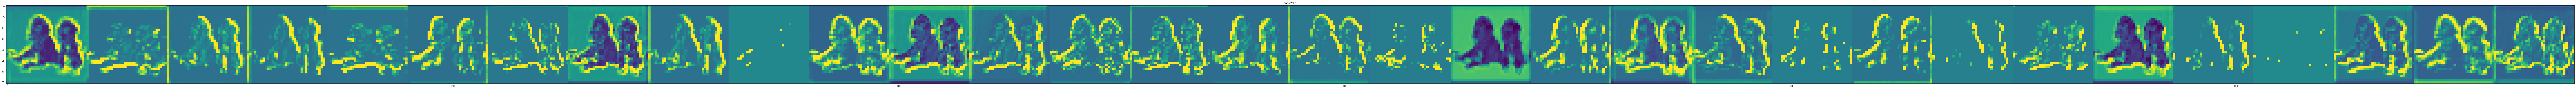

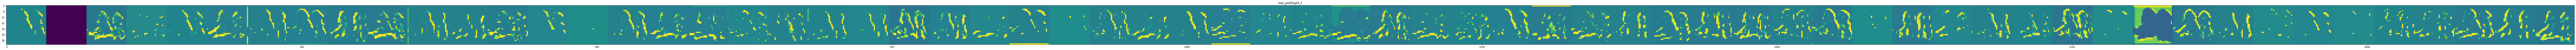

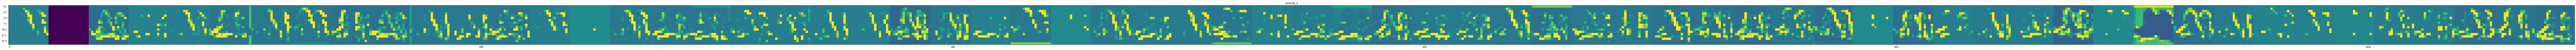

In [49]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 200. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

### Predict from the test Image

In [79]:
class_name = ['cat','dog']

In [100]:
val_cat_fnames = os.listdir( validation_cats_dir )
val_dog_fnames = os.listdir( validation_dogs_dir )

In [101]:
from tensorflow.keras.preprocessing import image
def load(path):
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    return images

cat


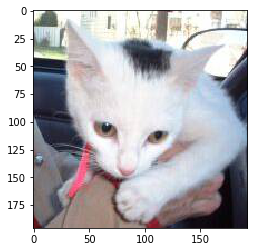

In [102]:
img_path= os.path.join(validation_cats_dir, val_cat_fnames[4])
img = mpimg.imread(img_path)
img_p = load(img_path)
print(class_name[model.predict(img_p).flatten()[0].astype('int')])
plt.imshow(img)

dog


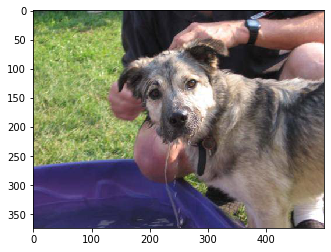

In [103]:
img_path= os.path.join(validation_dogs_dir, val_dog_fnames[4])
img = mpimg.imread(img_path)
img_p = load(img_path)
print(class_name[model.predict(img_p).flatten()[0].astype('int')])
plt.imshow(img)